In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.float_format',lambda x : "{:.2f}".format(x))
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:


# Load datasets
customers = pd.read_csv(r"C:\Users\varun\Desktop\CDAC\Project\Credit_Risk_Model\data\customers.csv")
loans = pd.read_csv(r"C:\Users\varun\Desktop\CDAC\Project\Credit_Risk_Model\data\loans.csv")
bureau = pd.read_csv(r"C:\Users\varun\Desktop\CDAC\Project\Credit_Risk_Model\data\bureau_data.csv")

customers.head(2)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [3]:
loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [4]:
bureau.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [5]:
customers.info()
loans.info()
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cust_id                   50000 non-null  object
 1   age                       50000 non-null  int64 
 2   gender                    50000 non-null  object
 3   marital_status            50000 non-null  object
 4   employment_status         50000 non-null  object
 5   income                    50000 non-null  int64 
 6   number_of_dependants      50000 non-null  int64 
 7   residence_type            49938 non-null  object
 8   years_at_current_address  50000 non-null  int64 
 9   city                      50000 non-null  object
 10  state                     50000 non-null  object
 11  zipcode                   50000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data colu

### Merging the data

In [6]:
df = pd.merge(customers,loans, on='cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [7]:
df = pd.merge(df, bureau, on='cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
df['default'] = df['default'].astype(int)

In [10]:
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### Default is our target and we can see some class imbalance here.

### Train Test Split

lets perform train test split before doing EDA to prevent data leakage. we don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop("default",axis=1)
y = df['default']

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state = 42, stratify =y)

df_train = pd.concat([X_train,y_train],axis=1)

df_test = pd.concat([X_test,y_test],axis=1)

df_train.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0


## Data Cleaning

### Handle missing & Duplicate Values

In [12]:
df_train.shape

(37500, 33)

In [13]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [14]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

Lets fill the nan values with mode of the data

In [15]:
mode_residence = df_train['residence_type'].mode()[0]
mode_residence

'Owned'

In [16]:
df_train['residence_type'].fillna(mode_residence,inplace=True)
df_test['residence_type'].fillna(mode_residence, inplace = True)
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
df_train.duplicated().sum()

np.int64(0)

In [18]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,1333819.51,986298.87,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,1213674.44,1043145.01,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,422197.50,287040.25,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,997427.50,665014.50,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,1784879.00,1234062.75,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [19]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [20]:
columns_continuous = ['age','income','number_of_dependants','years_at_current_address',
                         'sanction_amount','loan_amount','processing_fee','gst','net_disbursement',
                      'loan_tenure_months','principal_outstanding','bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts','total_loan_months','delinquent_months',
                      'total_dpd','enquiry_count','credit_utilization_ratio'
                     ]

columns_categorical = ['gender','marital_status','employment_status','residence_type','city',
                      'state','zipcode','loan_purpose','loan_type','default']

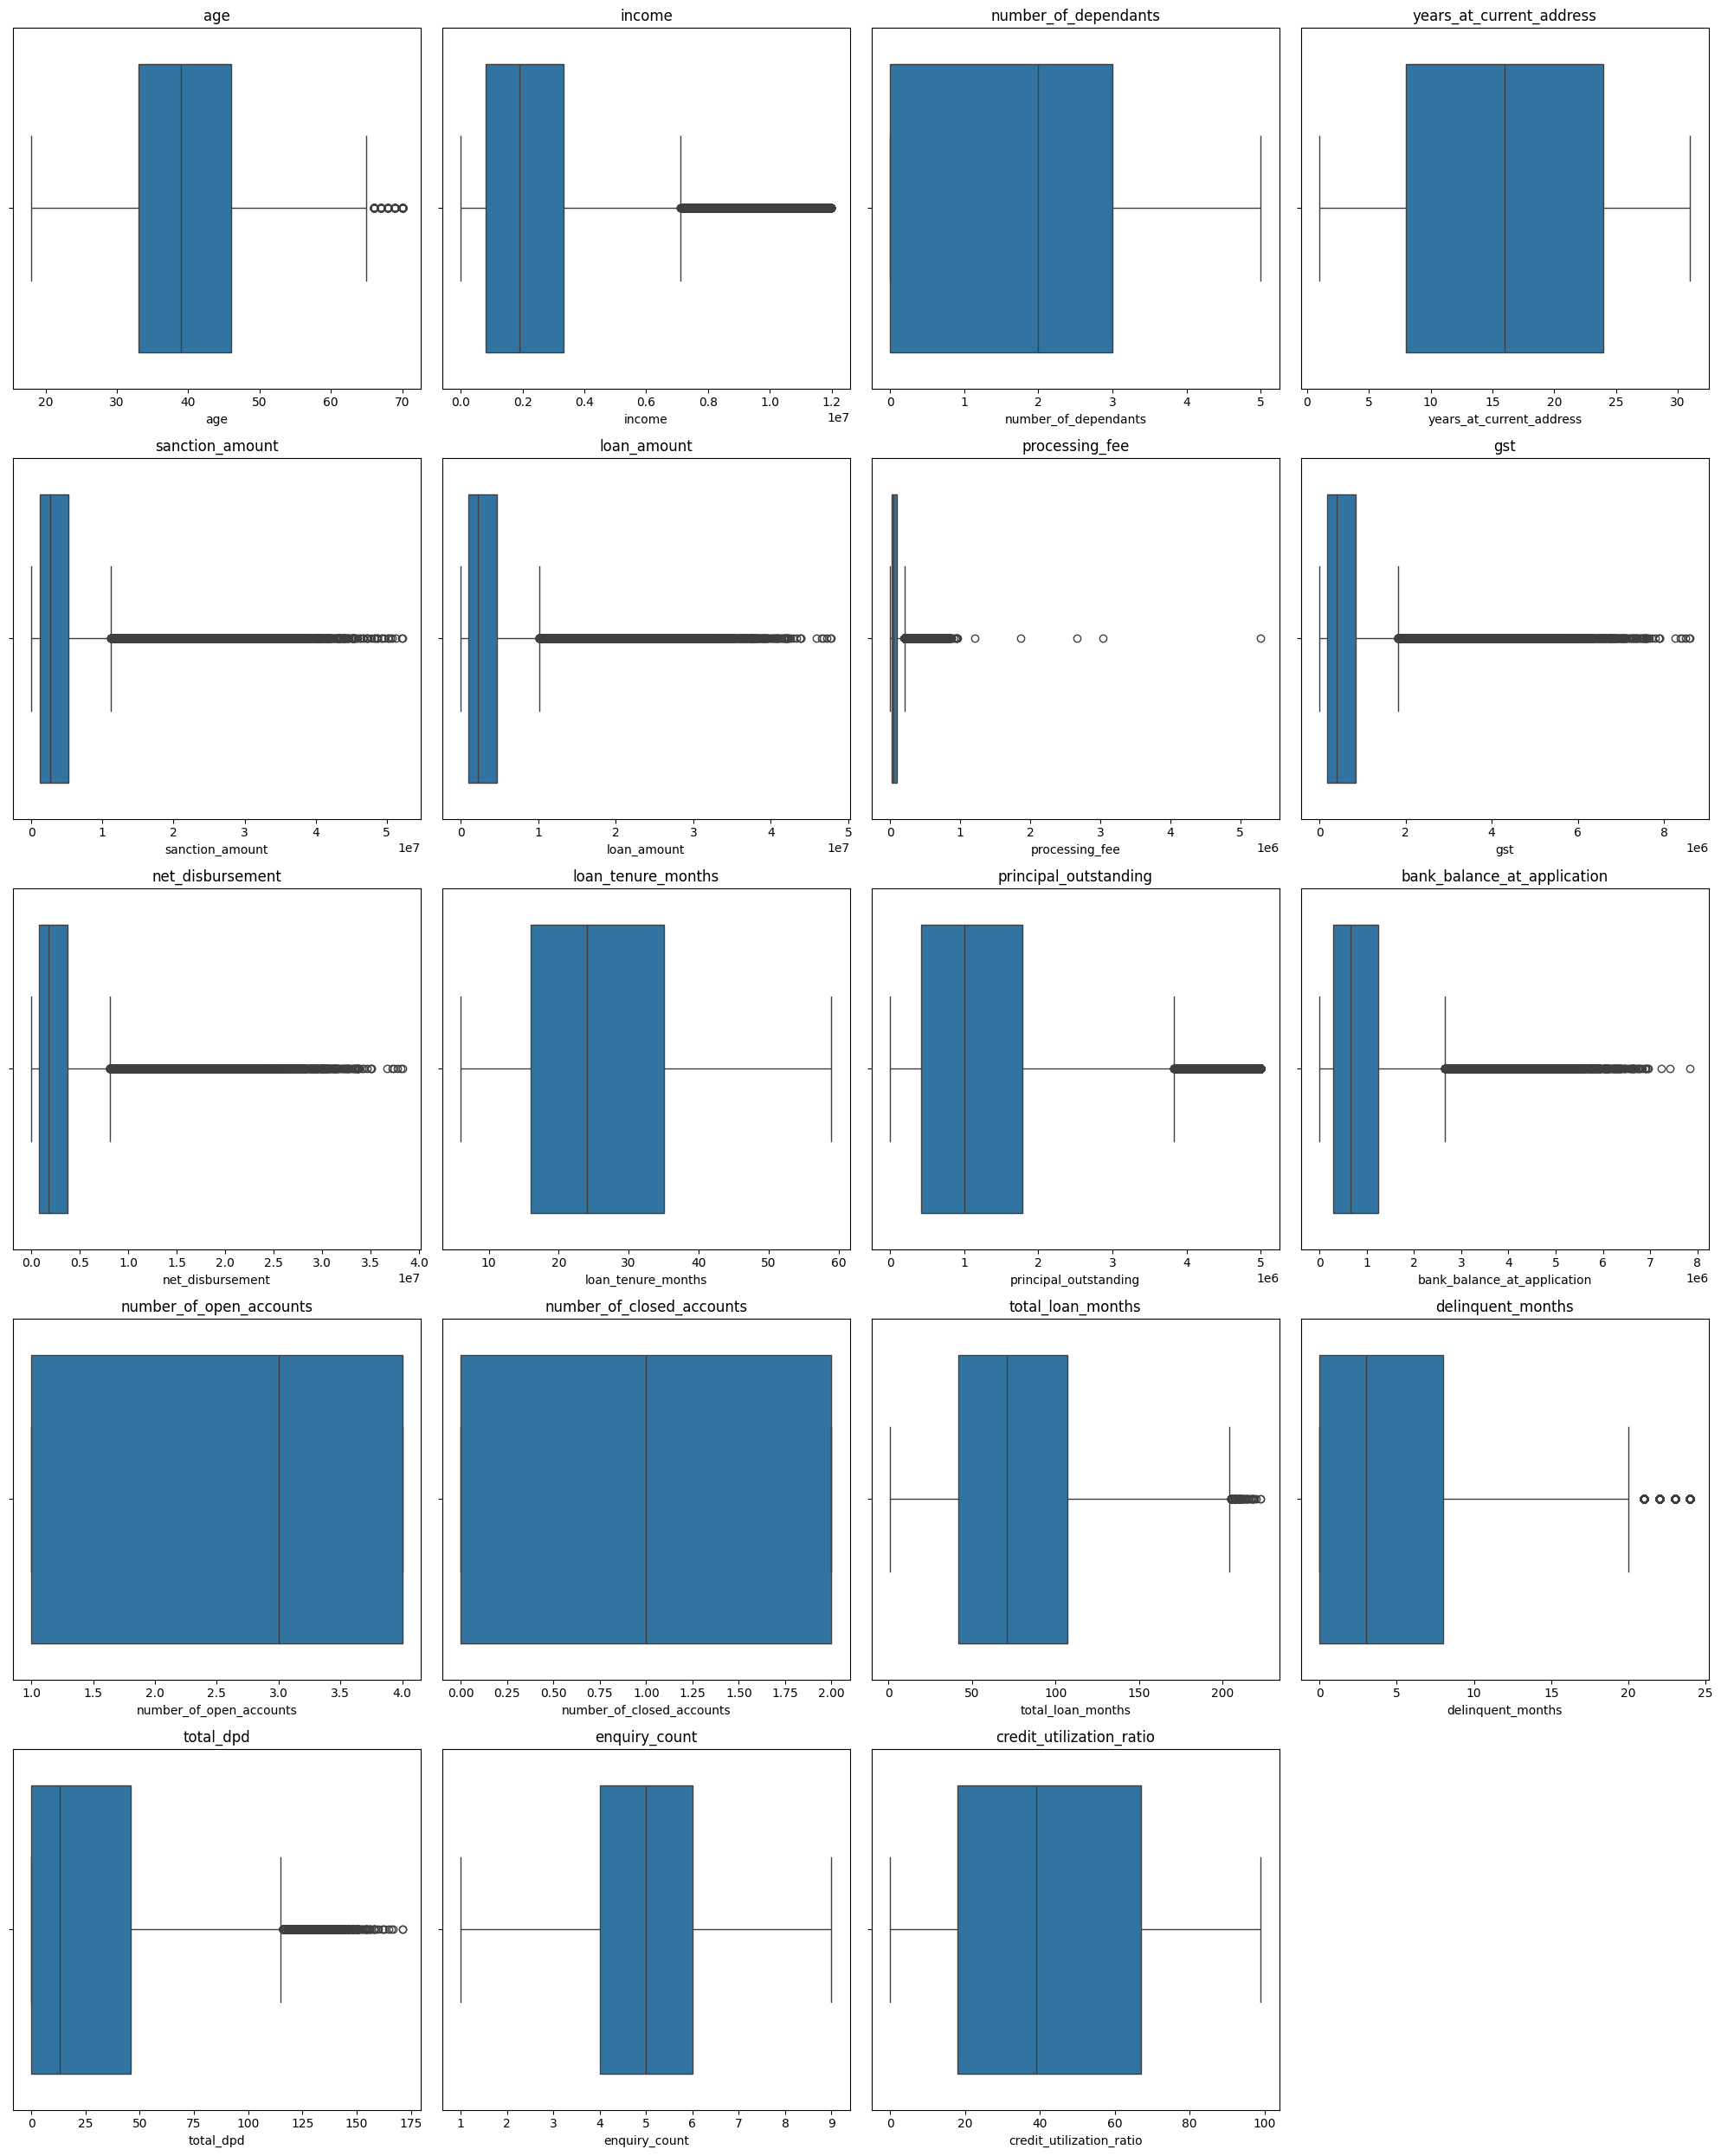

In [21]:
num_plots = len(columns_continuous)
num_col =4
num_rows = (num_plots + num_col -1)// num_col

fig, axes = plt.subplots(num_rows,num_col, figsize = (5*num_col,5*num_rows))
axes = axes.flatten()

for i,col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col],ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1,num_col*num_rows):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

### Outlier Removal : Processing Fee

In [22]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [23]:
df_train['processing_fee'].max()

np.float64(5293543.524214393)

In [23]:
df_train[df_train['processing_fee']==df_train['processing_fee'].max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,5293543.52


In [24]:
df_train[df_train['processing_fee']>df_train['loan_amount']][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [25]:
df_train[['loan_amount','processing_fee']][df_train['processing_fee']>df_train['loan_amount']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


### These 5 records are the outliers as processing fee is more than loan_amount which is never the case usually processing fee will be a max of 3% of loan amount

In [26]:
df_train.shape

(37500, 33)

In [27]:
df_train[df_train['processing_fee']/df_train['loan_amount']>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [28]:
df_train_1 = df_train[df_train['processing_fee']/df_train['loan_amount']<0.03].copy()
df_train_1.shape

(37488, 33)

In [29]:
df_train_1['residence_type'].isna().sum()

np.int64(0)

In [30]:
##= Apply same step on test set

df_test = df_test[df_test['processing_fee']/df_test['loan_amount']<0.03].copy()
df_test.shape

(12497, 33)

### Analyzing Categorical Columns

In [31]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [32]:
df_train_1['gender'].unique()

array(['M', 'F'], dtype=object)

In [33]:
df_train_1['marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [34]:
df_train_1['employment_status'].unique()

array(['Self-Employed', 'Salaried'], dtype=object)

In [35]:
df_train_1['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [36]:
df_train_1['city'].unique()

array(['Hyderabad', 'Mumbai', 'Chennai', 'Bangalore', 'Pune', 'Kolkata',
       'Ahmedabad', 'Delhi', 'Lucknow', 'Jaipur'], dtype=object)

In [37]:
df_train_1['state'].unique()

array(['Telangana', 'Maharashtra', 'Tamil Nadu', 'Karnataka',
       'West Bengal', 'Gujarat', 'Delhi', 'Uttar Pradesh', 'Rajasthan'],
      dtype=object)

In [38]:
df_train_1['zipcode'].unique()

array([500001, 400001, 600001, 560001, 411001, 700001, 380001, 110001,
       226001, 302001])

In [39]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto', 'Personaal'], dtype=object)

In [40]:
df_train_1['loan_type'].unique()

array(['Secured', 'Unsecured'], dtype=object)

In [41]:
df_train_1['default'].unique()

array([0, 1])

In [42]:
## issue in loan_purpose 
## Personaal -> Personal

df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [43]:
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

### Exploratory Data Analysis

In [44]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Age Column

In [45]:
df_train_1['age'].describe()

count   37488.00
mean       39.54
std         9.86
min        18.00
25%        33.00
50%        39.00
75%        46.00
max        70.00
Name: age, dtype: float64

In [46]:
df_train_1.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.00,39.77,9.88,18.00,33.00,40.00,46.00,70.00
1,3223.00,37.12,9.29,18.00,31.00,37.00,44.00,70.00


#### Insights

1. Average age in the default group is little less(37.12) than the average(39.7) of the group that did not default
2. Standard deviate is similar in both the groups
3. both the groups have similar min and max ages

In [47]:
df_train_1['age'][df_train_1['default']==1]

17207    48
1667     34
27077    39
33648    28
19720    45
         ..
43624    20
36473    40
26189    37
45236    39
37784    31
Name: age, Length: 3223, dtype: int64

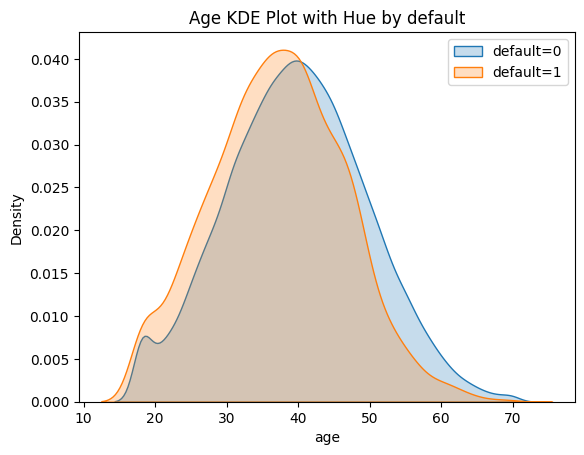

In [48]:
sns.kdeplot(df_train_1['age'][df_train_1['default']==0],fill=True,label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default']==1],fill=True,label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

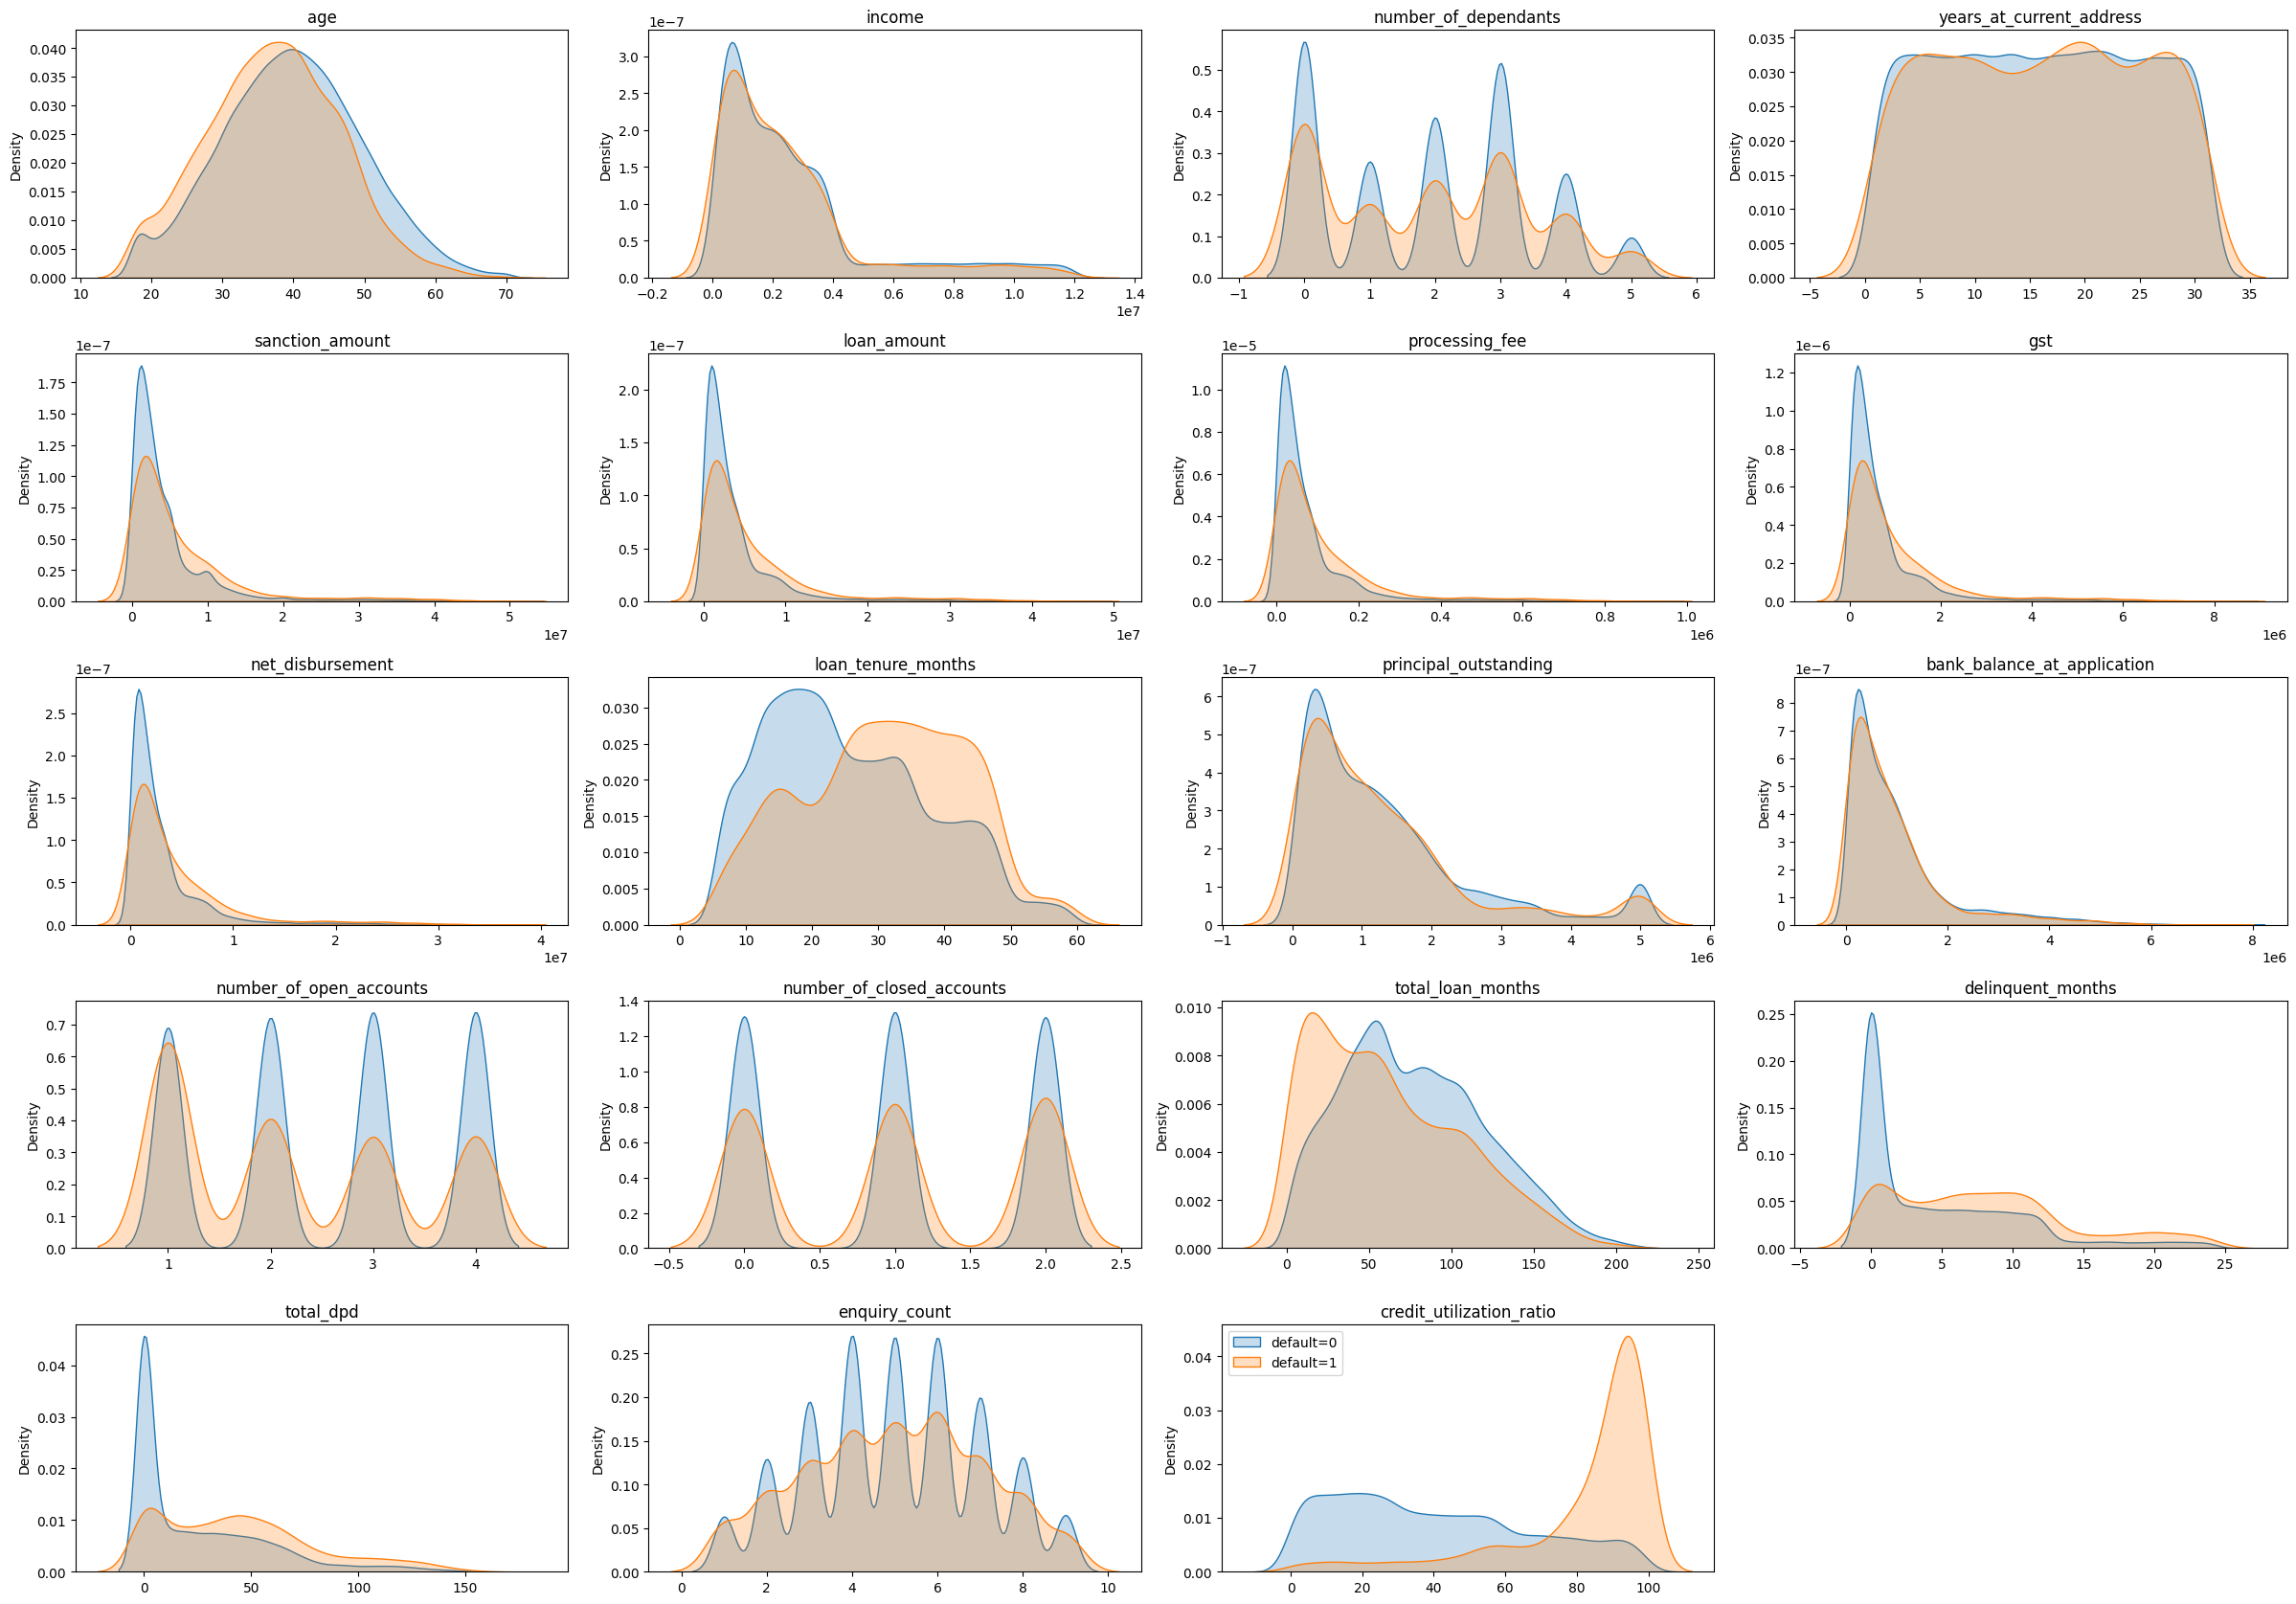

In [49]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0],fill=True,label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1],fill=True,label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.legend()
plt.show()

### Insights
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization 
    higher values indicate high likelyhood of becoming a default. Hence these 4 looks like
    strong predictors
2. In remaining columns the distributions do not give any obvious insights
3. Why loan_amount and income did not give any signs of being strong predictors?
   May be when we combine these two and get loan to income ratio (LTI), 
   that may have influence on the target variable. We will explore more later

## Feature Engineering , Feature Selection

### Generating Loan to Income (LTI) ratio

In [50]:
df_train_1[['loan_amount','income']].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [51]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [52]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'],2)

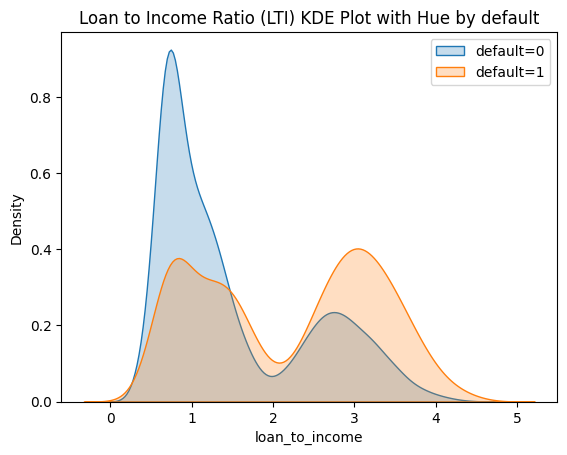

In [53]:
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']==0],fill=True,label = 'default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']==1],fill=True,label = 'default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

### Insights
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high rish loan

## Generate Delinquency Ratio

In [54]:
df_train_1['delinquency_ratio'] = round(df_train_1['delinquent_months']*100/df_train_1['total_loan_months'],2)
df_test['delinquency_ratio'] = round(df_test['delinquent_months']*100/df_test['total_loan_months'],2)

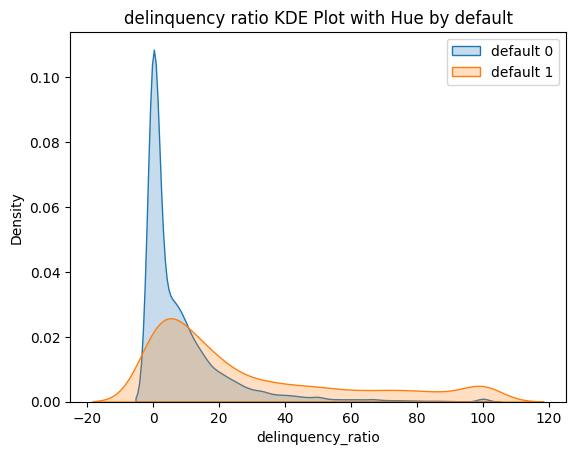

In [55]:
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default']==0],fill=True,label="default 0")
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default']==1],fill=True,label="default 1")
plt.title(f"delinquency ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

## Insights 
1) Blue graph has majority of its values on lower side of delinquency ratio
2) Orange graph has many values when delinquency ratio is higher indicating some correlation on default


### Generate Avg DPD Per Delinquency

In [56]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    round(df_train_1['total_dpd']/df_train_1['delinquent_months'],2),0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months']!=0,
    round(df_test['total_dpd']/df_test['delinquent_months'],2),0

)

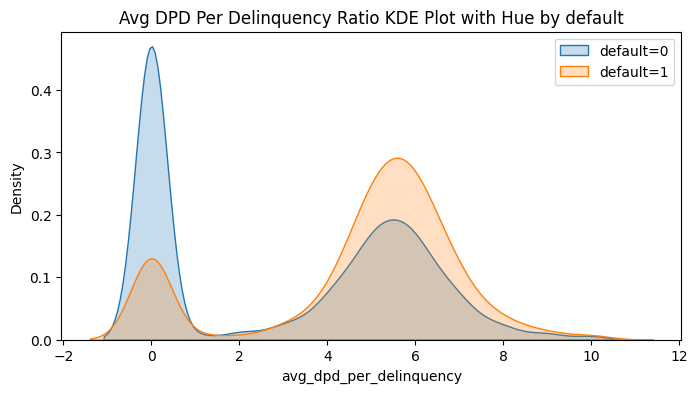

In [57]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

### Insights
1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high.
    This means this column is a strong predictor

### lets remove columns that are just unique ids and don't have influence on target

In [58]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'],axis=1)
df_test = df_test.drop(['cust_id','loan_id'],axis=1)

### Removing unnecessary columns

In [60]:
df_train_3 = df_train_2.drop(['disbursal_date','delinquent_months','total_dpd','installment_start_dt','income','loan_amount','total_loan_months'],axis=1)
df_test = df_test.drop(['disbursal_date','delinquent_months','total_dpd','installment_start_dt','income','loan_amount','total_loan_months'],axis=1)
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
X_train = df_train_3.drop(['default'],axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X_train.select_dtypes(['int64','float64']).columns.drop('zipcode')

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,418876.24,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,169029.87,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,400001.00,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [62]:
X_test = df_test.drop(['default'],axis=1)
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,419759.82,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,168845.35,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,411001.00,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,560001.00,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [70]:
pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.5 MB 5.1 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.5 MB 5.1 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.5 MB 5.4 MB/s eta 0:00:01
   ----------------------- ---------------- 5.5/9.5 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.5 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [64]:
X_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,500001,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,400001,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,600001,...,0.49,0.33,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,560001,...,0.64,0.20,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,411001,...,0.17,0.12,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [70]:
calculate_vif(X_train[cols_to_scale])

,Column,VIF
0,age,5.55
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,101.08
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.17
8,principal_outstanding,16.32
9,bank_balance_at_application,9.33


In [71]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


In [72]:
X_train_1 = X_train.drop(features_to_drop_vif,axis=1)
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns.drop('zipcode')
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [73]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.27
1,number_of_dependants,2.72
2,years_at_current_address,3.34
3,loan_tenure_months,6.01
4,bank_balance_at_application,1.80
5,number_of_open_accounts,4.35
6,number_of_closed_accounts,2.35
7,enquiry_count,6.30
8,credit_utilization_ratio,2.88
9,loan_to_income,4.54


In [74]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [75]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [76]:
df_train_3[numeric_columns]

,age,number_of_dependants,years_at_current_address,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,59,3,30,28,4820526,4,2,4,36,2.07,13.16,5.90
32495,44,0,27,50,216697,3,1,5,5,1.61,6.25,6.20
43675,38,0,26,32,1383842,1,1,4,0,3.54,22.22,5.58
9040,42,2,30,40,626203,3,0,8,87,1.13,0.00,0.00
13077,58,4,29,15,585099,1,2,1,71,0.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28515,70,0,20,12,501594,2,0,5,13,0.57,0.00,0.00
5558,39,0,26,32,587429,1,0,4,44,1.11,26.92,5.14
45236,39,4,10,38,517025,4,2,6,97,3.37,8.46,4.00
49228,33,2,26,37,475147,2,1,6,25,1.48,0.00,0.00


In [77]:
df_train_3[numeric_columns.append(pd.Index(['default']))]

,age,number_of_dependants,years_at_current_address,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,default
12746,59,3,30,28,4820526,4,2,4,36,2.07,13.16,5.90,0
32495,44,0,27,50,216697,3,1,5,5,1.61,6.25,6.20,0
43675,38,0,26,32,1383842,1,1,4,0,3.54,22.22,5.58,0
9040,42,2,30,40,626203,3,0,8,87,1.13,0.00,0.00,0
13077,58,4,29,15,585099,1,2,1,71,0.50,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,70,0,20,12,501594,2,0,5,13,0.57,0.00,0.00,0
5558,39,0,26,32,587429,1,0,4,44,1.11,26.92,5.14,0
45236,39,4,10,38,517025,4,2,6,97,3.37,8.46,4.00,1
49228,33,2,26,37,475147,2,1,6,25,1.48,0.00,0.00,0


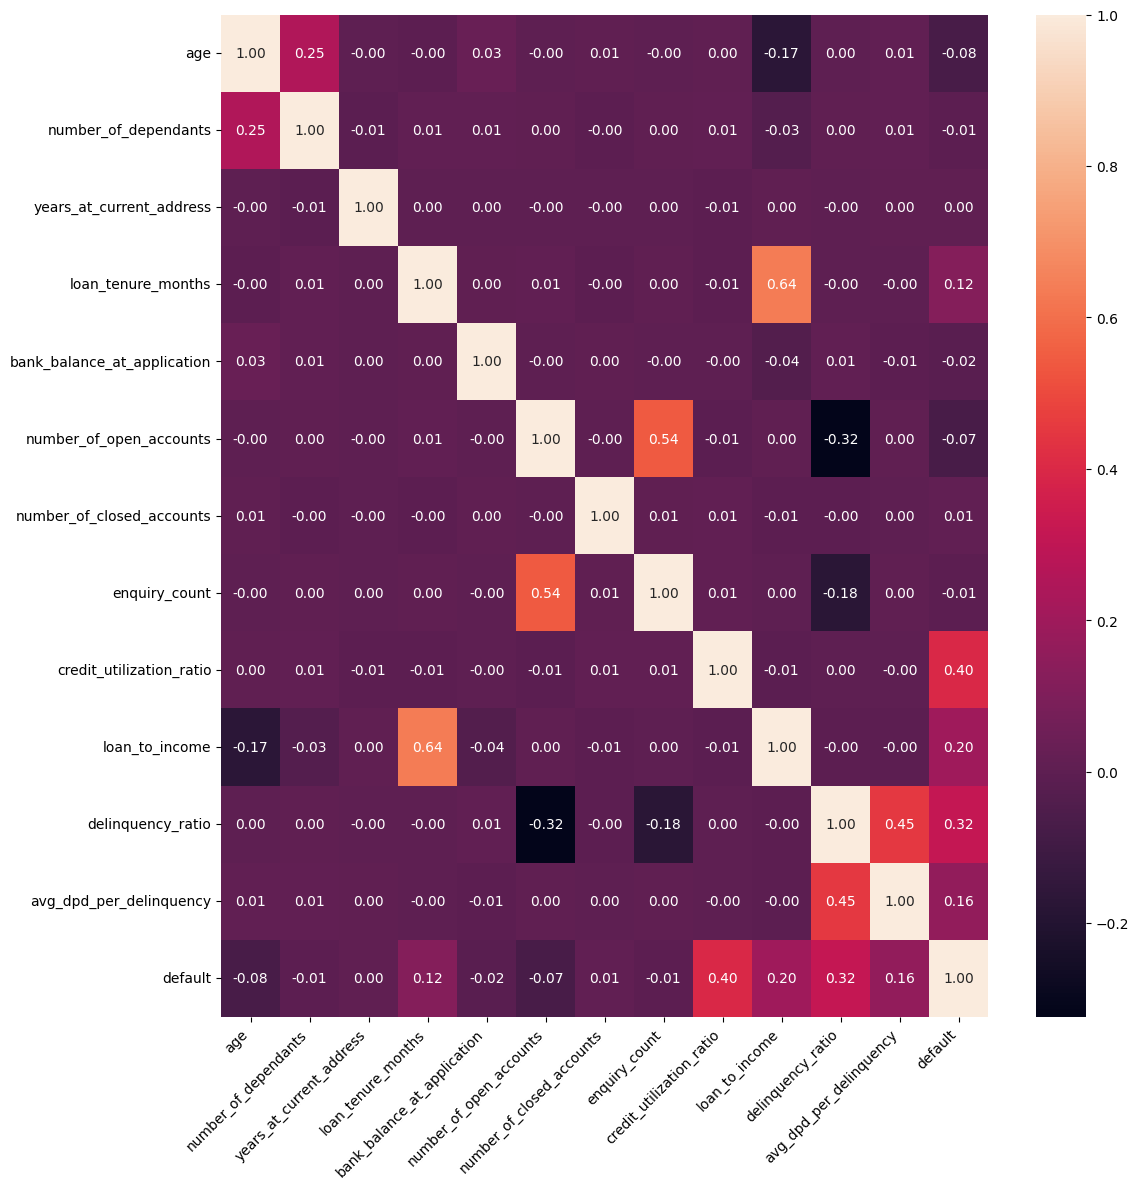

In [78]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, fmt="0.2f",annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection: Categorical Features

In [79]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [80]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,500001,...,Secured,0.42,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,400001,...,Secured,0.83,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,600001,...,Secured,0.49,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,560001,...,Secured,0.64,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,411001,...,Unsecured,0.17,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [81]:
pd.concat([X_train_1,y_train],axis=1).groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


## Calculate WOE and IV

In [ ]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(